# WhatsApp Group Chat Analysis

In [11]:
import regex as re
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [12]:
#Function that can detect whether each line starts with a date as it states that it is a unique message:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

#Function to extract the usernames in the chats as Authors:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

#A function to separate all the information from each other so that we could easily use the information as a pandas dataframe:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [14]:
data = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'bff.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                data.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [15]:
df = pd.DataFrame(data, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
2034,2021-10-10,21:04,Asshole,<Media omitted>
2035,2021-10-10,21:16,Geijin,Mera order kab aaraha hai
2036,2021-10-10,21:17,Geijin,Imported
2037,2021-10-10,21:17,Geijin,Wo bata
2038,2021-10-10,21:17,Geijin,Blue dart services thik thak de raha hai
2039,2021-10-10,21:18,Geijin,Yrr tu 15 ko resignation de raha hai at least ...
2040,2021-10-10,21:21,Geijin,free hoke k call karna
2041,2021-10-10,21:21,Geijin,and pics lena khane ki
2042,2021-10-10,21:22,Asshole,10
2043,2021-10-10,21:22,Asshole,18


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2054 non-null   datetime64[ns]
 1   Time      2054 non-null   object        
 2   Author    1967 non-null   object        
 3   Message   2054 non-null   object        
 4   emoji     2054 non-null   object        
 5   urlcount  2054 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 96.4+ KB


In [16]:
df.Author.unique()

array(['Geijin', 'Asshole', None, 'Asshole:'], dtype=object)

In [19]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 0 to 2053
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1967 non-null   datetime64[ns]
 1   Time      1967 non-null   object        
 2   Author    1967 non-null   object        
 3   Message   1967 non-null   object        
 4   emoji     1967 non-null   object        
 5   urlcount  1967 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 107.6+ KB


In [20]:
total_messages = df.shape[0]
print(total_messages)

1967


In [22]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Chat with my bff")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

277
0
Chat with my bff
Messages: 1967
Media: 277
Emojis: 0
Links: 4


In [23]:
media_messages_df = df[df['Message'] == '<Media omitted>']

In [24]:
messages_df = df.drop(media_messages_df.index)
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 2051
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1690 non-null   datetime64[ns]
 1   Time      1690 non-null   object        
 2   Author    1690 non-null   object        
 3   Message   1690 non-null   object        
 4   emoji     1690 non-null   object        
 5   urlcount  1690 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 92.4+ KB


In [25]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [26]:
messages_df.tail(20)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
2028,2021-10-10,20:56,Geijin,Female dog,[],0,10,2,1
2029,2021-10-10,20:56,Geijin,Kuttiya,[],0,7,1,1
2030,2021-10-10,20:56,Geijin,Chutiya mere bhen hai wo,[],0,24,5,1
2031,2021-10-10,20:57,Asshole,🐦,[],0,1,1,1
2033,2021-10-10,21:03,Asshole,Aaj taco kaya,[],0,13,3,1
2035,2021-10-10,21:16,Geijin,Mera order kab aaraha hai,[],0,25,5,1
2036,2021-10-10,21:17,Geijin,Imported,[],0,8,1,1
2037,2021-10-10,21:17,Geijin,Wo bata,[],0,7,2,1
2038,2021-10-10,21:17,Geijin,Blue dart services thik thak de raha hai,[],0,40,8,1
2039,2021-10-10,21:18,Geijin,Yrr tu 15 ko resignation de raha hai at least ...,[],0,55,13,1


In [27]:
l = ['Asshole','Geijin']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Asshole -
Messages Sent 650
Words per message 3.06
Media Messages Sent 135
Emojis Sent 0
Links Sent 0

Stats of Geijin -
Messages Sent 1039
Words per message 3.873917228103946
Media Messages Sent 142
Emojis Sent 0
Links Sent 4



# TOTAL EMOJIS USED

In [28]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

0


In [29]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

In [30]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count


In [ ]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

There are 30375 words in all the messages.


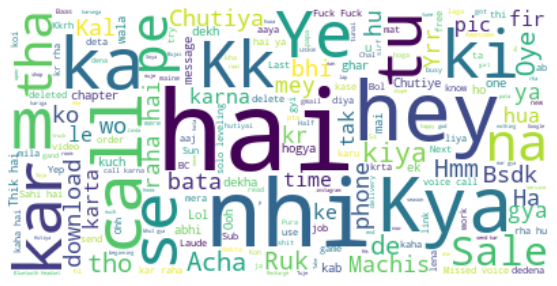

In [32]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Asshole


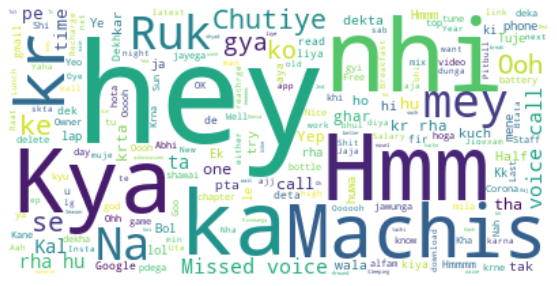

Author name Geijin


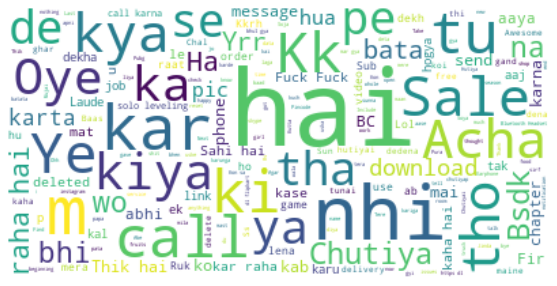

In [34]:
l = ['Asshole','Geijin']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()